# Felipe Veloso Regularización

## Ejercicio 1: Preparación del Ambiente de Trabajo

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn-darkgrid')

In [18]:
from sklearn.preprocessing import StandardScaler #algunos algortimos solamente no deben ser estandarizados
from sklearn.linear_model import Ridge , RidgeCV, Lasso, LassoCV ,ElasticNet , ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score

In [19]:
df = pd.read_csv('winequality-red.csv')

In [20]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Ejercicio 2: Análisis exploratorio

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


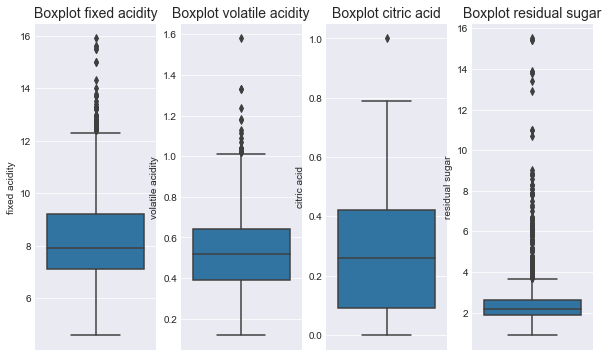

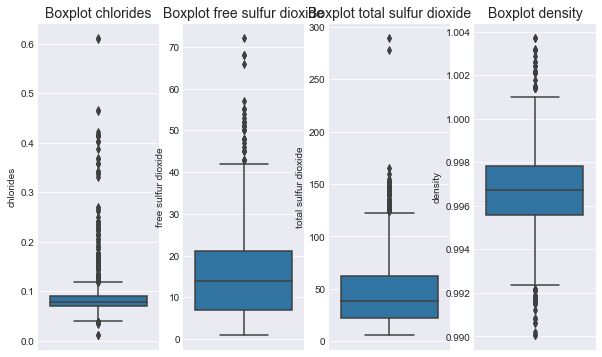

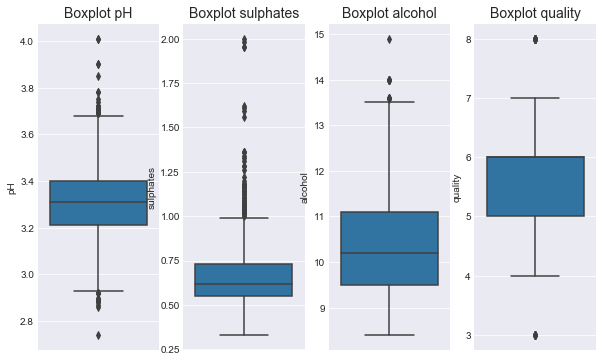

In [22]:
i= 0
max_columns=4
columns = df.columns
for col in columns:
   plt.subplot(1, max_columns,(i % max_columns)+1)
   sns.boxplot(x=col,data=df, orient='v').set_title(f'Boxplot {col}',size =14)
   i+=1
   if ((i%max_columns)==0):
       plt.show()
    
#sns.boxplot(data = df,orient='v')

Se verifican variados outliers en la mayoria de los datos, en el caso de residual sugar se ve una gran cantidad de datos fuera que escapan de la otra data.al igual que cuando revisamos chlorides y sulphates

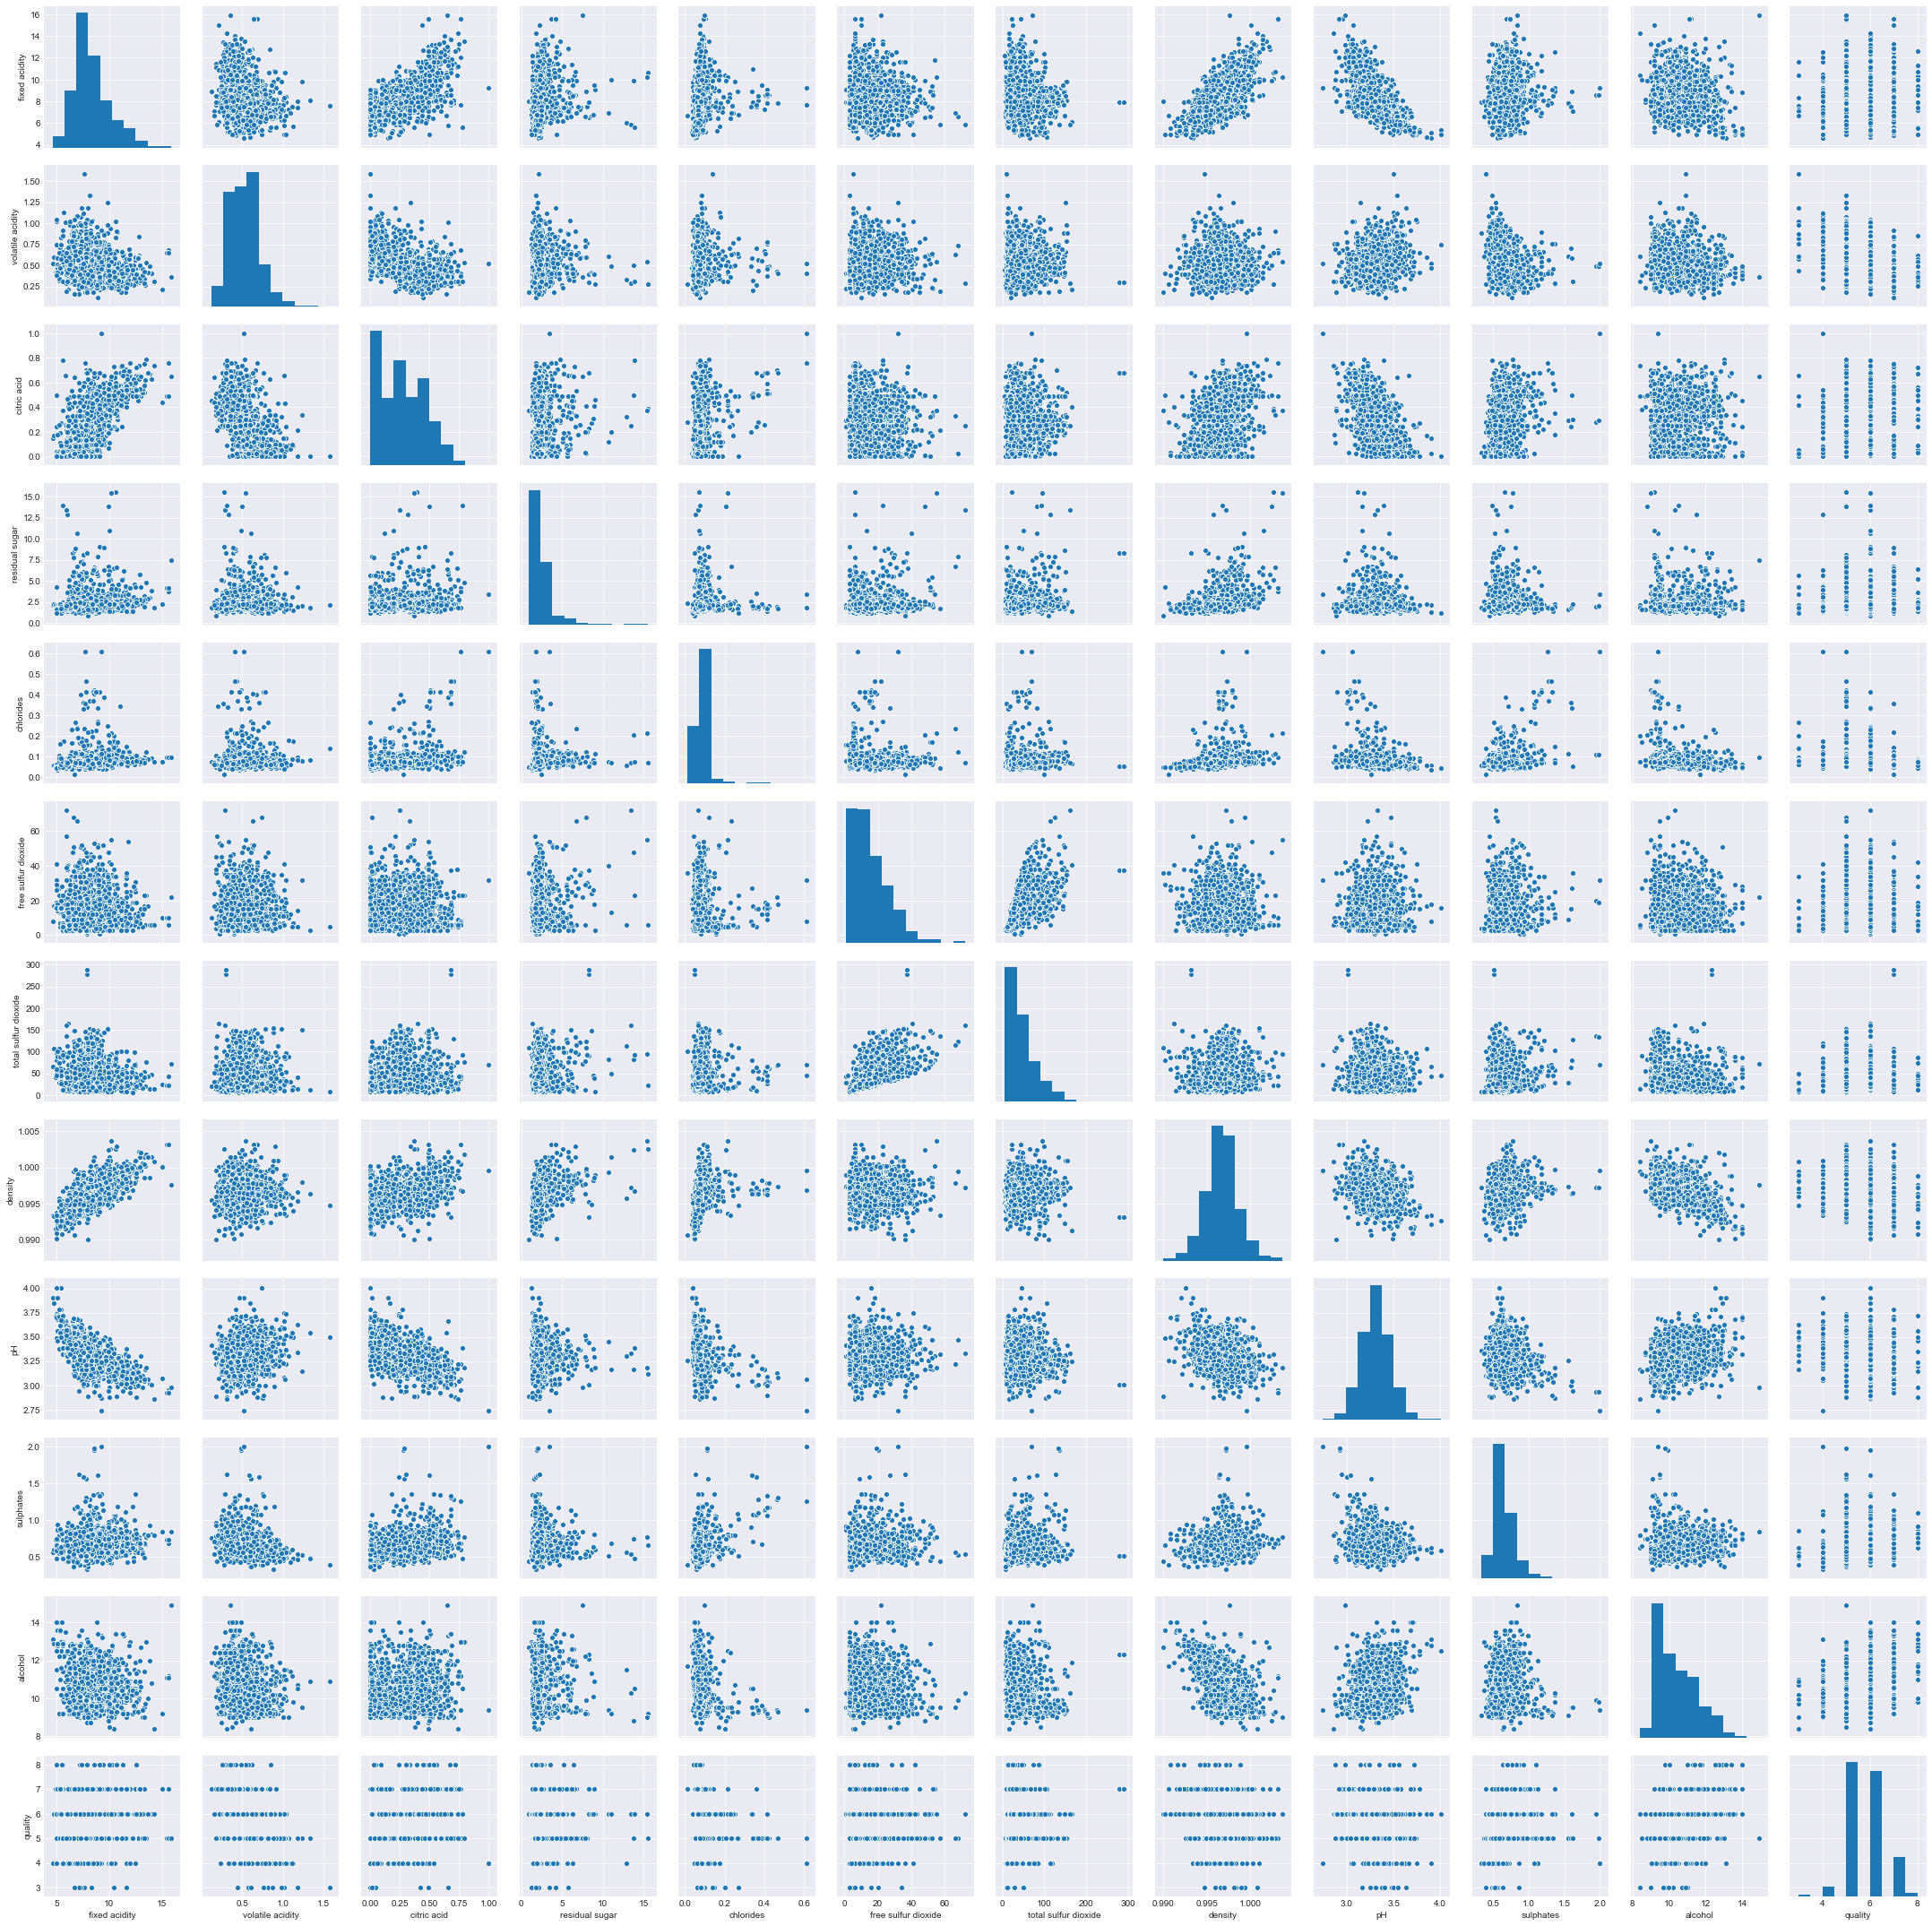

In [23]:
sns.pairplot(df)


## Ejercicio 3: Regularización de modelos

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [25]:
alphas = np.logspace(0,7, base=10)

In [26]:
X = df_scaled.iloc[:, :11] #ignora la primera linea que seria la de precios
y = df_scaled['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=456)

In [27]:
ridge_cv = RidgeCV(cv = 10)
model_ridge = ridge_cv.fit(X_train,y_train)

In [28]:
model_ridge.alpha_ , model_ridge.coef_

(10.0, array([ 0.05142986, -0.25110496, -0.03422368,  0.01835273, -0.1057602 ,
         0.03826772, -0.11922156, -0.02337854, -0.07860238,  0.17613415,
         0.38408802]))

In [29]:
print(r2_score(y_test, model_ridge.predict(X_test))) 

0.304958236066457


In [30]:
mean_squared_error(y_test, model_ridge.predict(X_test))

0.6314710224974942

In [31]:
median_absolute_error(y_test, model_ridge.predict(X_test))

0.4704859751790446

In [32]:
lasso_cv = LassoCV(cv =10)
model_lasso = lasso_cv.fit(X_train,y_train)

In [33]:
model_lasso.alpha_ , model_lasso.coef_

(0.014669571805145037,
 array([ 0.01417935, -0.24373588, -0.        ,  0.        , -0.08653872,
         0.        , -0.08306371, -0.        , -0.06200421,  0.1546486 ,
         0.3877025 ]))

In [34]:
print(r2_score(y_test, model_lasso.predict(X_test))) 

0.29651538997776083


In [35]:
mean_squared_error(y_test, model_lasso.predict(X_test))

0.6391416588952915

In [36]:
median_absolute_error(y_test, model_lasso.predict(X_test))

0.4727877771048222

In [37]:
elastic_cv = ElasticNetCV(cv=10)
model_elastic_net = elastic_cv.fit(X_train,y_train)

In [38]:
model_elastic_net.alpha_ , model_elastic_net.coef_

(0.027361783525643963,
 array([ 0.01594295, -0.24221336, -0.        ,  0.        , -0.08725816,
         0.        , -0.08373893, -0.        , -0.06055195,  0.15455903,
         0.38322103]))

In [39]:
r2_score(y_test,model_elastic_net.predict(X_test))

0.2970153860822674

In [40]:
mean_squared_error(y_test, model_elastic_net.predict(X_test))

0.6386873940327448

In [41]:
median_absolute_error(y_test, model_elastic_net.predict(X_test))

0.4703092485048196

In [42]:
model_ridge.store_cv_values

False

Nuestro Modelo de Lasso presenta unas mejoras metricas al momento de analizar el conjunto de datos, presenciamos un lambda de = `0.0146`

volatile acidity, PH,  sulphates , alcohol, mantienen su comportamiento en todas las mediciones, ninguna de esta es penalizada muy distinto en cualquiera de los 3 modelos que regulan